,Model,MSE,RMSE,R²
0,Linear Regression,3880103.67,1969.80,-6.8174
1,Random Forest,67680.25,260.15,0.8636
2,XGBoost,59717.46,244.37,0.8797


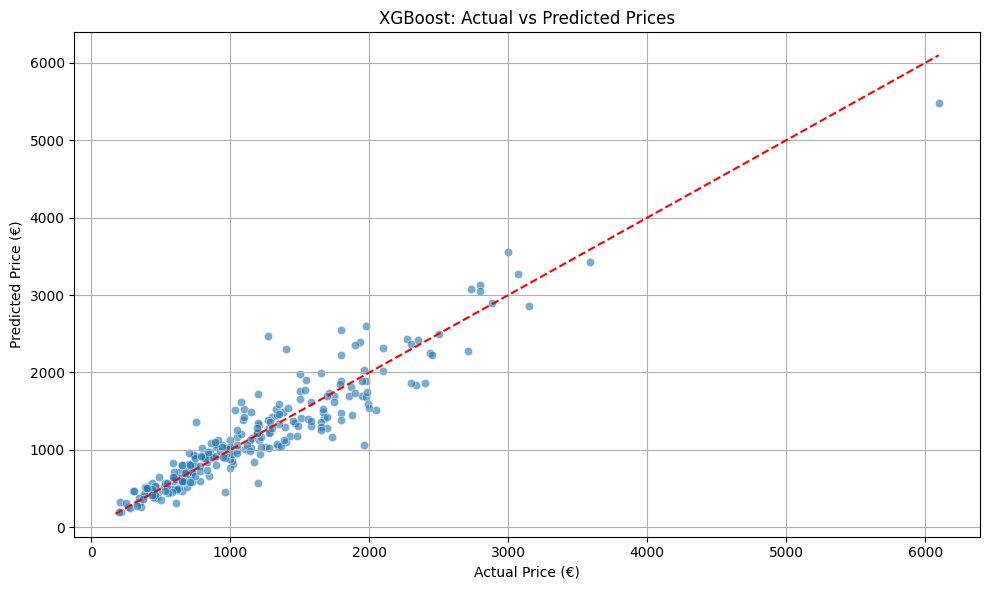

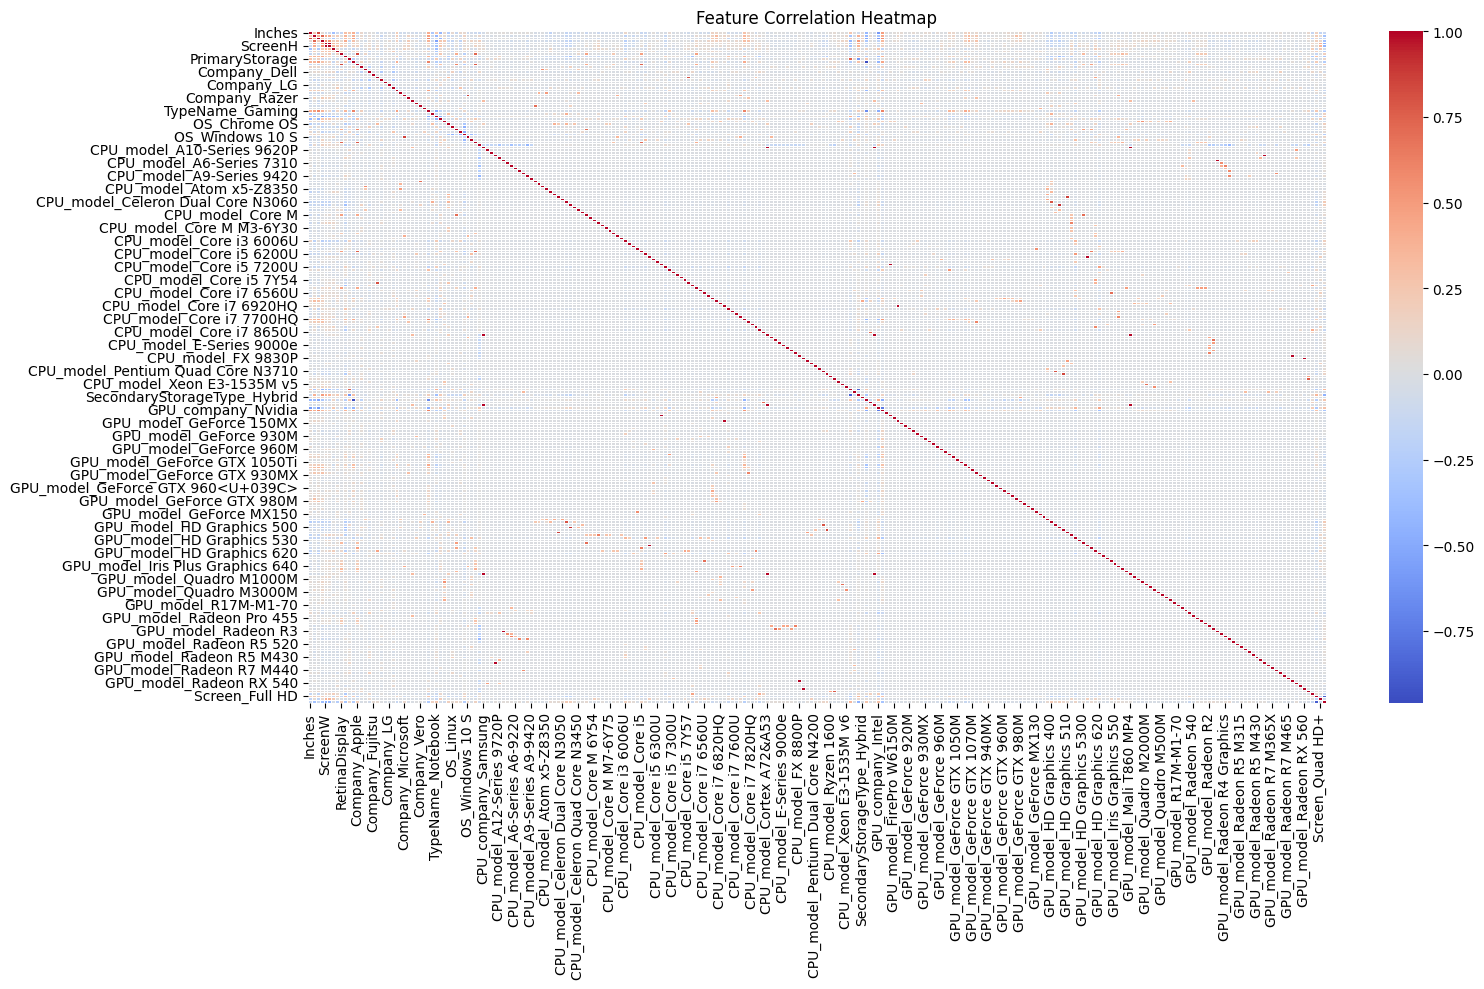

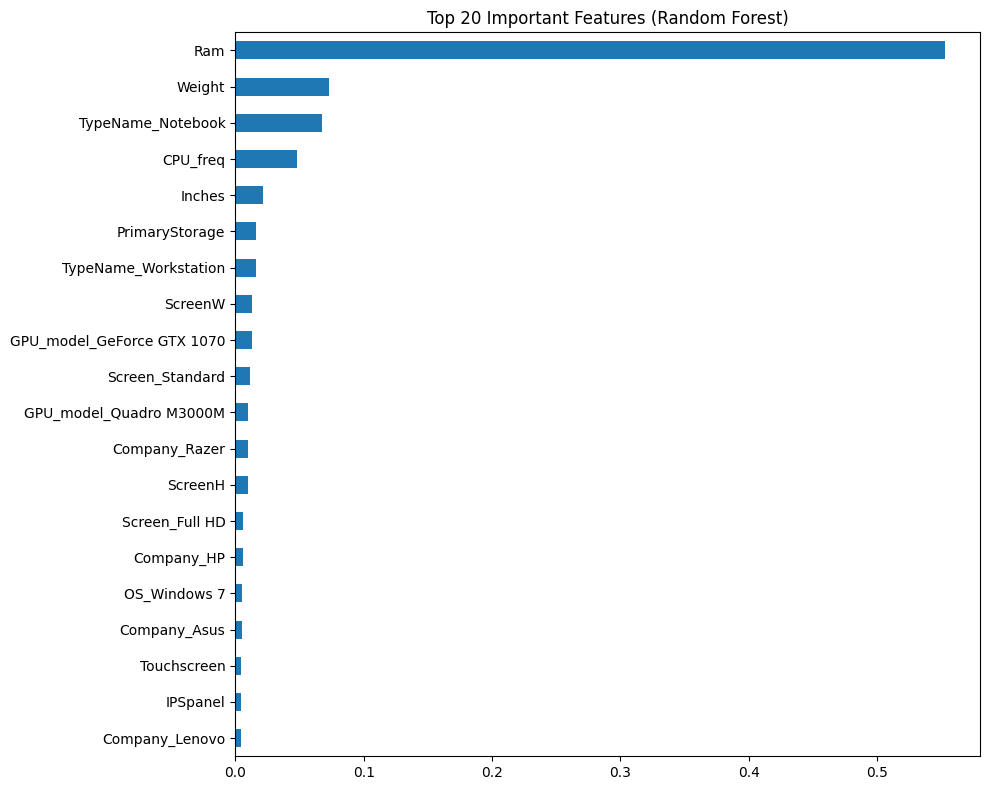

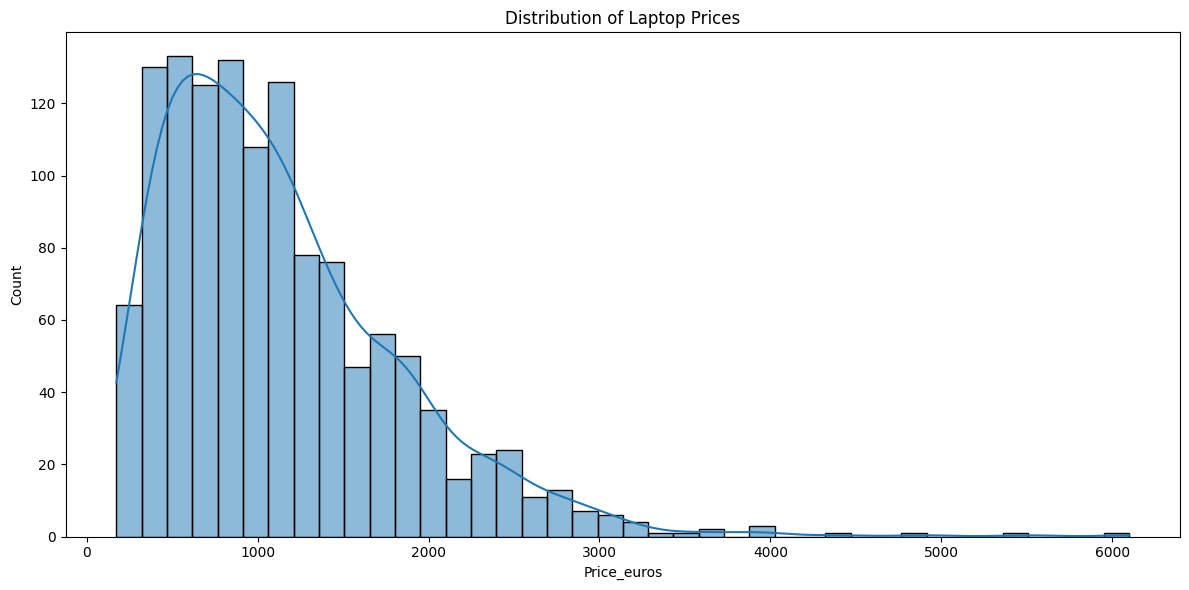

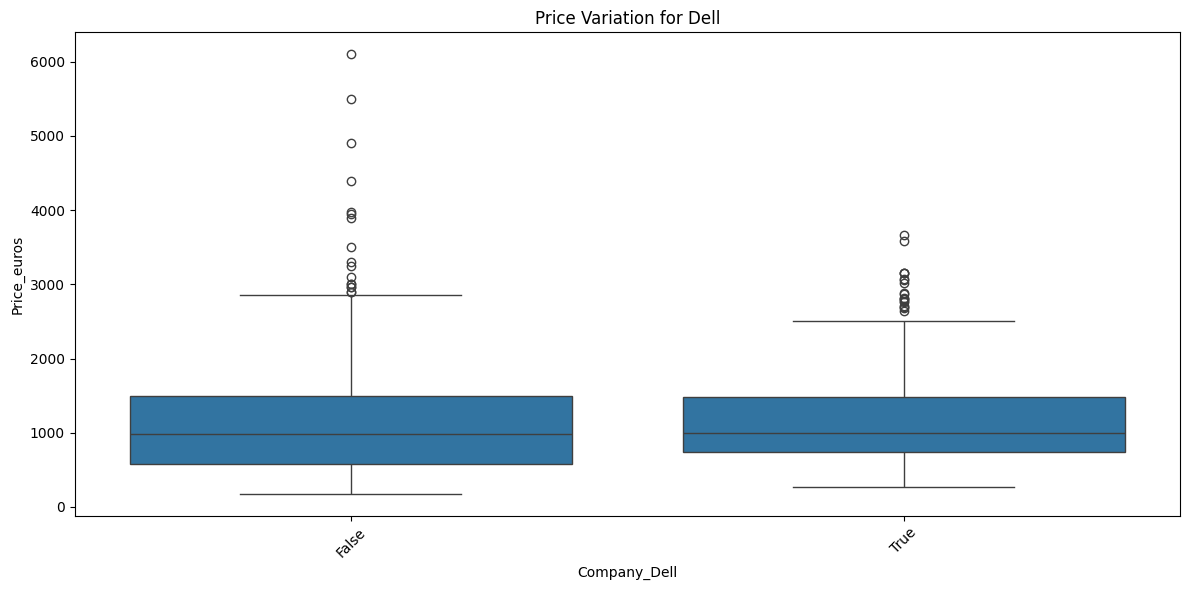

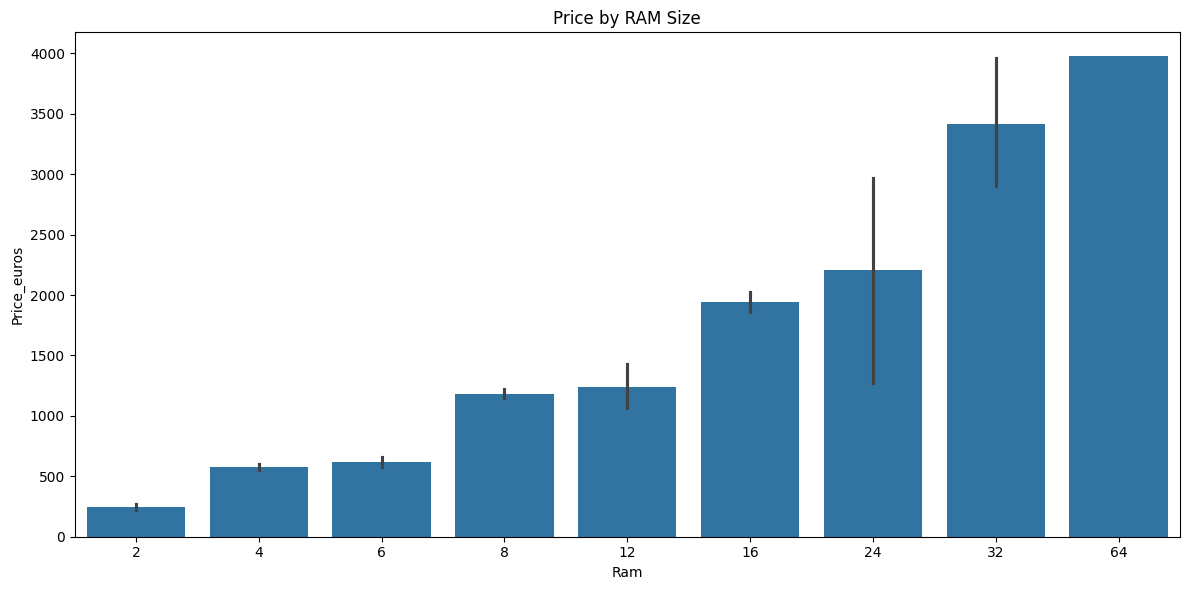

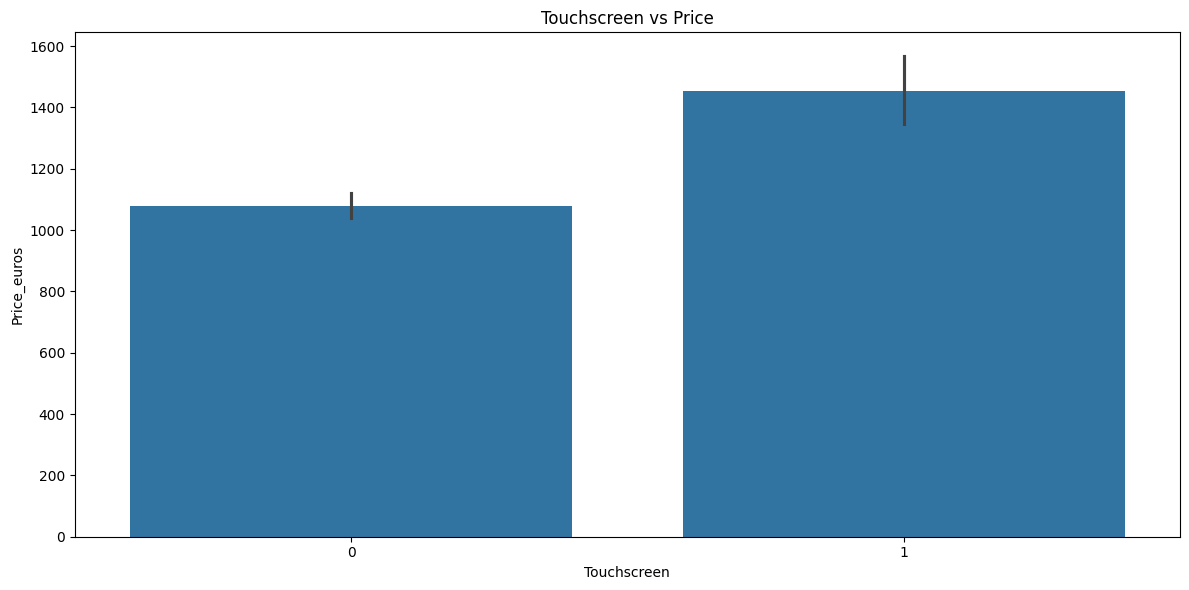

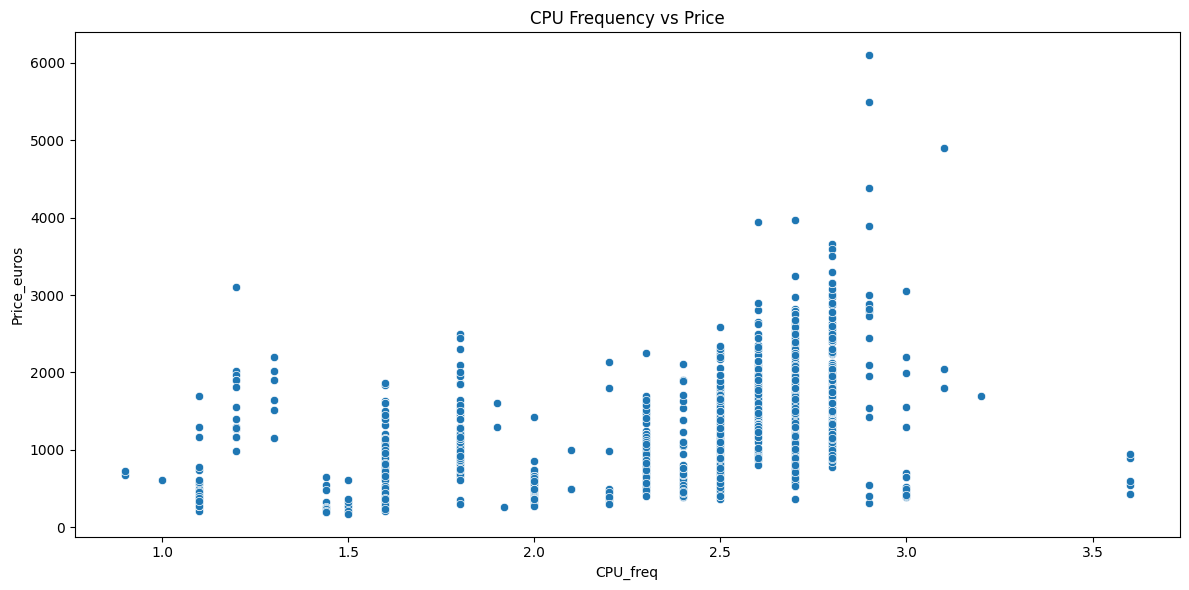

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/laptop_prices.csv')

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df['Touchscreen'] = df['Touchscreen'].map({'Yes': 1, 'No': 0})
df['IPSpanel'] = df['IPSpanel'].map({'Yes': 1, 'No': 0})
df['RetinaDisplay'] = df['RetinaDisplay'].map({'Yes': 1, 'No': 0})
df['Weight'] = df['Weight'].astype(float)

categorical = ['Company', 'TypeName', 'OS', 'CPU_company', 'CPU_model',
               'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company',
               'GPU_model', 'Screen']
df = pd.get_dummies(df, columns=categorical, drop_first=True)

X = df.drop(['Price_euros', 'Product'], axis=1)
y = df['Price_euros']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return round(mse,2), round(rmse,2), round(r2,4)

results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MSE': [evaluate(y_test, y_pred_lr)[0], evaluate(y_test, y_pred_rf)[0], evaluate(y_test, y_pred_xgb)[0]],
    'RMSE': [evaluate(y_test, y_pred_lr)[1], evaluate(y_test, y_pred_rf)[1], evaluate(y_test, y_pred_xgb)[1]],
    'R²': [evaluate(y_test, y_pred_lr)[2], evaluate(y_test, y_pred_rf)[2], evaluate(y_test, y_pred_xgb)[2]]
}

results_df = pd.DataFrame(results)
display(results_df)

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price (€)')
plt.ylabel('Predicted Price (€)')
plt.title('XGBoost: Actual vs Predicted Prices')
plt.grid(True)
plt.tight_layout()
plt.show()

corr = df.corr(numeric_only=True)
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:20]
plt.figure(figsize=(10,8))
imp.plot(kind='barh')
plt.title('Top 20 Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['Price_euros'], bins=40, kde=True)
plt.title('Distribution of Laptop Prices')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x=df['Company_Dell'], y=df['Price_euros'])
plt.xticks(rotation=45)
plt.title('Price Variation for Dell')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=df['Ram'], y=df['Price_euros'])
plt.title('Price by RAM Size')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=df['Touchscreen'], y=df['Price_euros'])
plt.title('Touchscreen vs Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['CPU_freq'], y=df['Price_euros'])
plt.title('CPU Frequency vs Price')
plt.tight_layout()
plt.show()
